# 1. Preprocessing

In [1]:
import pandas as pd
import os

In [2]:
file_dir='./data/'
os.listdir(file_dir)

['2022_data.xlsx', 'desktop.ini']

In [3]:
df=pd.read_excel(file_dir+'2022_data.xlsx')
df.head(5)

,id,Q1,RQ1,Q3,Q3B1,Q3B2,Q3B3,Q4,Q4A01,Q4A02,...,Q9,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_PLA,D_Q1,D_TYP
0,276,1,1,4,NaN,NaN,NaN,1,1.0,2.0,...,5,1,1,13,2,2,4,2,1,1.0
1,283,1,1,4,NaN,NaN,NaN,1,1.0,2.0,...,5,1,1,13,2,2,4,2,1,1.0
2,286,1,1,4,NaN,NaN,NaN,1,1.0,2.0,...,5,1,1,13,1,2,4,2,1,NaN
3,289,4,4,2,13.0,NaN,NaN,1,1.0,2.0,...,5,1,1,13,1,2,2,2,4,1.0
4,300,1,1,4,NaN,NaN,NaN,1,1.0,2.0,...,5,1,1,2,2,2,4,3,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19543 entries, 0 to 19542
Columns: 188 entries, id to D_TYP
dtypes: float64(167), int64(21)
memory usage: 28.0 MB


In [5]:
df2=df.loc[(df['Q3']==1)|(df['Q3']==2),:]

In [6]:
df2.head(3)

,id,Q1,RQ1,Q3,Q3B1,Q3B2,Q3B3,Q4,Q4A01,Q4A02,...,Q9,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_PLA,D_Q1,D_TYP
3,289,4,4,2,13.0,NaN,NaN,1,1.0,2.0,...,5,1,1,13,1,2,2,2,4,1.0
6,312,1,1,1,5.0,4.0,NaN,1,NaN,2.0,...,5,1,1,13,1,2,1,1,1,1.0
8,324,1,1,2,4.0,3.0,1.0,1,1.0,2.0,...,5,1,1,2,1,2,2,1,1,1.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 3 to 19542
Columns: 188 entries, id to D_TYP
dtypes: float64(167), int64(21)
memory usage: 14.2 MB


In [8]:
df2=df2.loc[(df2['Q3B1']==6)|(df2['Q3B2']==6)|(df2['Q3B3']==6), :]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 34 to 19525
Columns: 188 entries, id to D_TYP
dtypes: float64(167), int64(21)
memory usage: 1.8 MB


In [9]:
df3=df2.drop(['id','Q1', 'RQ1', 'Q3', 'Q4',
          '서울박TOT', '경기박TOT', '인천박TOT', '강원박TOT', '대전박TOT', '충북박TOT',
          '대전박TOT', '충북박TOT', '충남박TOT', '세종박TOT', '경북박TOT', '경남박TOT', '대구박TOT', '울산박TOT',
          '부산박TOT', '광주박TOT', '전북박TOT', '전남박TOT', '제주박TOT',
          '서울일TOT', '경기일TOT', '인천일TOT', '강원일TOT', '대전일TOT', '충북일TOT',
          '충남일TOT', '세종일TOT', '경북일TOT', '경남일TOT', '대구일TOT', '울산일TOT',
          '부산일TOT', '광주일TOT', '전북일TOT', '전남일TOT', '제주일TOT',
          'Q2a1', 'Q2a2', 'MQ2A2_61','RQ2A2',
          '호텔숙박60', '모텔숙박60', '펜션숙박60', '콘도숙박60', '유스숙박60',
          '야영숙박60', '연수숙박60', '한옥숙박60', '게스숙박60', '민박숙박60',
          '휴양숙박60', '친지숙박60','기타숙박60',
          '총액1인TOT', 'C총액1인MIS', '총액1인MIS', 'DAYall평균', 'DAY평균', 'RDAY평균',
          'Q7','Q8', 'Q9',
          'D_MON', 'D_BUN', 'D_NAT', 'D_SEX', 'D_AGE', 'D_MOK', 'D_PLA', 'D_Q1', 'D_TYP']
         , axis=1)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 34 to 19525
Columns: 114 entries, Q3B1 to Q11_1a17t
dtypes: float64(113), int64(1)
memory usage: 1.1 MB


In [11]:
df3.drop(df3.loc[:, '서울박60':'제주박60'], axis=1, inplace=True) # numerical
df3.drop(df3.loc[:, '서울일61':'제주일61'], axis=1, inplace=True) # numerical
stay_bak=df2.loc[:, '서울박60':'제주박60']
stay_il=df2.loc[:, '서울일61':'제주일61']
df3=pd.concat([df3, stay_bak, stay_il], axis=1)
df3.head(3)

,Q3B1,Q3B2,Q3B3,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,...,세종일61,경북일61,경남일61,대구일61,울산일61,부산일61,광주일61,전북일61,전남일61,제주일61
34,4.0,6.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,6.0,1.0,10.0,1.0,2.0,NaN,NaN,5.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,6.0,2.0,4.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 34 to 19525
Columns: 114 entries, Q3B1 to 제주일61
dtypes: float64(113), int64(1)
memory usage: 1.1 MB


In [13]:
df3.columns[80:]

Index(['서울박60', '경기박60', '인천박60', '강원박60', '대전박60', '충북박60', '충남박60', '세종박60',
       '경북박60', '경남박60', '대구박60', '울산박60', '부산박60', '광주박60', '전북박60', '전남박60',
       '제주박60', '서울일61', '경기일61', '인천일61', '강원일61', '대전일61', '충북일61', '충남일61',
       '세종일61', '경북일61', '경남일61', '대구일61', '울산일61', '부산일61', '광주일61', '전북일61',
       '전남일61', '제주일61'],
      dtype='object')

In [14]:
df3.iloc[:, :80]=df3.iloc[:, :80].fillna('')
df3.iloc[:, 80:]=df3.iloc[:, 80:].fillna(0)
df3.iloc[:, :80]=df3.iloc[:, :80].astype('str')
df3.iloc[:, 80:]=df3.iloc[:, 80:].astype('float')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 34 to 19525
Columns: 114 entries, Q3B1 to 제주일61
dtypes: float64(34), object(80)
memory usage: 1.1+ MB


In [15]:
for i in df3.columns:
    print(i)

Q3B1
Q3B2
Q3B3
Q4A01
Q4A02
Q4A03
Q4A04
Q4A05
Q4A06
Q4A07
Q4A08
Q4A09
Q4A10
Q4A11
Q4A12
Q4A13
Q4A14
Q4A15
Q4A16
Q4A17
Q4B1
Q4B2
Q4B3
Q5A01
Q5A02
Q5A03
Q5A04
Q5A05
Q5A06
Q5A07
Q5A08
Q5A09
Q5A10
Q5A11
Q5A12
Q5A13
Q5A14
Q5A15
Q5A16
Q5A17
KWON1
KWON2
KWON3
KWON4
KWON5
KWON6
KWON7
KWON8
Q11A$01
Q11A$02
Q11A$03
Q11A$04
Q11A$05
Q11A$06
Q11A$07
Q11A$08
Q11A$09
Q11A$10
Q11A$11
Q11A$12
Q11A$13
Q11A$14
Q11A$98
Q11_1a01t
Q11_1a02t
Q11_1a03t
Q11_1a04t
Q11_1a05t
Q11_1a06t
Q11_1a07t
Q11_1a08t
Q11_1a09t
Q11_1a10t
Q11_1a11t
Q11_1a12t
Q11_1a13t
Q11_1a14t
Q11_1a15t
Q11_1a16t
Q11_1a17t
서울박60
경기박60
인천박60
강원박60
대전박60
충북박60
충남박60
세종박60
경북박60
경남박60
대구박60
울산박60
부산박60
광주박60
전북박60
전남박60
제주박60
서울일61
경기일61
인천일61
강원일61
대전일61
충북일61
충남일61
세종일61
경북일61
경남일61
대구일61
울산일61
부산일61
광주일61
전북일61
전남일61
제주일61


# 2. Model

## 2.1. Model - KPrototypes

In [16]:
# !pip install kmodes

In [17]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

### 2.1.1. init='Cao'

In [18]:
cost_cao_df3=[]
X=df3
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', random_state=42,
                         n_jobs=-2, max_iter=15, n_init=2, verbose=2)
    kproto.fit_predict(X, categorical=[i for i in range(80)])
    cost_cao_df3.append(kproto.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


[71952.30980258611, 51784.27940875746, 45911.39313132357, 41027.2796024132, 38076.425849418396]


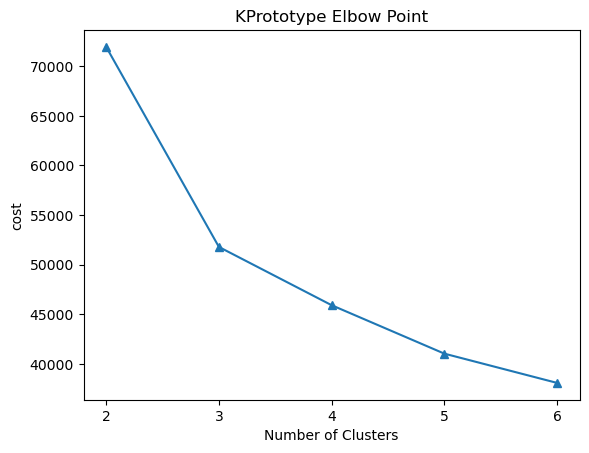

In [19]:
plt.title('KPrototype Elbow Point')
plt.plot(cost_cao_df3, marker='^')
plt.xlabel('Number of Clusters')
plt.ylabel('cost')
plt.xticks(ticks=range(5),labels=[i for i in range(2,7)])

print(cost_cao_df3)

### 2.1.2. init='Huang'

In [20]:
cost_huang_df3=[]
X=df3
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-2, max_iter=15, n_init=2, verbose=2)
    kproto.fit_predict(X, categorical=[i for i in range(80)])
    cost_huang_df3.append(kproto.cost_)

Best run was number 1
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 2


[71952.30980258611, 51784.27940875746, 44865.62279644035, 42677.004510763334, 36909.43483038889]


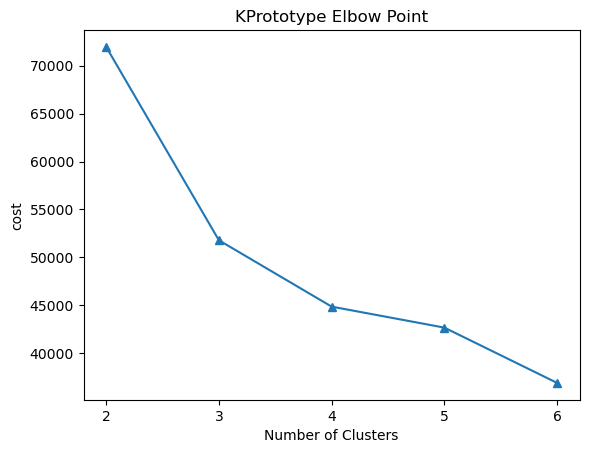

In [21]:
plt.title('KPrototype Elbow Point')
plt.plot(cost_huang_df3, marker='^')
plt.xlabel('Number of Clusters')
plt.ylabel('cost')
plt.xticks(ticks=range(5),labels=[i for i in range(2,7)])

print(cost_huang_df3)

## 2.2. Create optimal model: choose a number of clusters using a KneeLocator

In [22]:
# !pip install kneed

In [23]:
from kneed import KneeLocator
cost_knee_cao_df3=KneeLocator(x=range(2,7), y=cost_cao_df3, S=0.1,
                         curve='convex', direction='decreasing', online=True)
K_cost_cao_df3=cost_knee_cao_df3.elbow
print(f'{K_cost_cao_df3:.0f}')

3


In [24]:
from kneed import KneeLocator
cost_knee_huang_df3=KneeLocator(x=range(2,7), y=cost_huang_df3, S=0.1,
                         curve='convex', direction='decreasing', online=True)
K_cost_huang_df3=cost_knee_huang_df3.elbow
print(f'{K_cost_huang_df3:.0f}')

3


## 2.3. Check the distribution of people by group

In [25]:
kproto = KPrototypes(n_clusters=K_cost_cao_df3, init='Cao', random_state=42, n_jobs=-2, max_iter=15, n_init=2, verbose=2)
clusters=kproto.fit_predict(df3, categorical=[i for i in range(80)])
df3['cao_cluster']=clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


In [26]:
kproto = KPrototypes(n_clusters=K_cost_huang_df3, init='Huang', random_state=42, n_jobs=-2, max_iter=15, n_init=2, verbose=2)
clusters=kproto.fit_predict(df3, categorical=[i for i in range(80)])
df3['hua_cluster']=clusters

Best run was number 1


In [27]:
df3.head()

,Q3B1,Q3B2,Q3B3,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,...,경남일61,대구일61,울산일61,부산일61,광주일61,전북일61,전남일61,제주일61,cao_cluster,hua_cluster
34,4.0,6.0,2.0,1.0,2.0,3.0,,,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
190,6.0,1.0,10.0,1.0,2.0,,,5.0,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
192,6.0,2.0,4.0,1.0,2.0,,,5.0,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
329,6.0,,,1.0,,,,,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
332,13.0,6.0,,,2.0,3.0,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [28]:
df3.groupby(['cao_cluster'])['cao_cluster'].count()

cao_cluster
0    368
1    798
2     83
Name: cao_cluster, dtype: int64

In [29]:
df3.groupby(['hua_cluster'])['hua_cluster'].count()

hua_cluster
0    798
1     83
2    368
Name: hua_cluster, dtype: int64

- **Only the order of the groups is different, and the number of people per group is the same.**
- **In this model, select a model with init 'huang' to proceed.**

# 3. Dimensino reduction using FAMD(Factor Analysis of Mixed Data)

- I choose a FAMD algorithm for dimension reduction since the data what we use is mixed data(numerical features and categorical features).

## 3.1. FAMD

In [30]:
# !pip install prince

In [31]:
from prince import FAMD

X=df3.iloc[:,:-2]

famd = FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(X)

In [32]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,308.475,3.46%,3.46%
1,177.253,1.99%,5.45%


In [33]:
famd.row_coordinates(X).head()

component,0,1
34,-3.872790,41.893906
190,-9.110731,14.780930
192,-8.751761,16.536151
329,-19.724878,4.525741
332,0.762535,88.672803


In [34]:
famd.column_coordinates_

component,0,1
variable,,
서울박60,0.050886,0.049562
경기박60,0.002171,0.070196
인천박60,0.002651,0.066516
강원박60,0.079678,0.021604
대전박60,0.008264,0.004296
...,...,...
Q5A13,0.435433,0.047618
Q5A14,0.131810,0.007142
Q5A15,0.054905,0.010515


In [35]:
famd.plot(
    X,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [36]:
df_famd=pd.DataFrame(famd.row_coordinates(X))
df_famd.columns=['component0', 'component1']

In [37]:
df3=pd.concat([df3, df_famd], axis=1)
df3.head()

,Q3B1,Q3B2,Q3B3,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,...,울산일61,부산일61,광주일61,전북일61,전남일61,제주일61,cao_cluster,hua_cluster,component0,component1
34,4.0,6.0,2.0,1.0,2.0,3.0,,,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,-3.872790,41.893906
190,6.0,1.0,10.0,1.0,2.0,,,5.0,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,-9.110731,14.780930
192,6.0,2.0,4.0,1.0,2.0,,,5.0,,,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,-8.751761,16.536151
329,6.0,,,1.0,,,,,,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-19.724878,4.525741
332,13.0,6.0,,,2.0,3.0,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.762535,88.672803


## 3.2. Visualization

Text(0, 0.5, 'component 1')

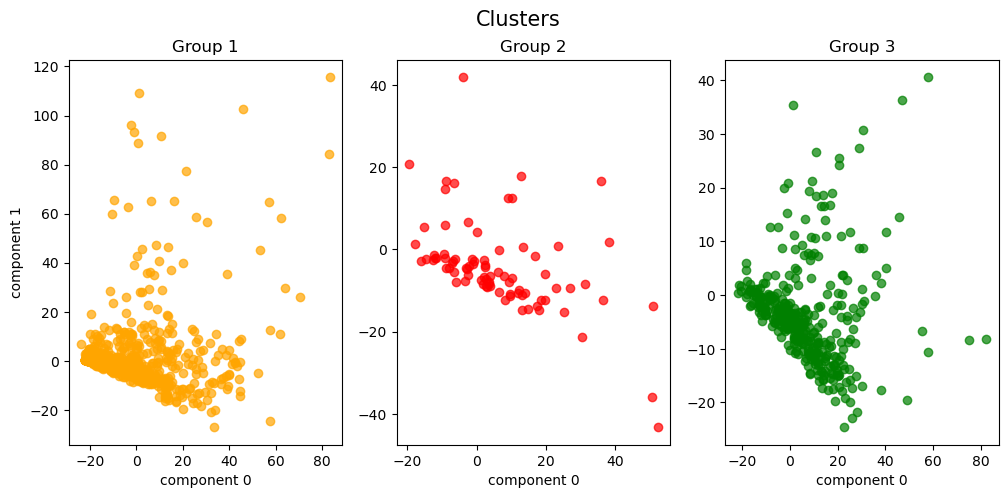

In [38]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1, 3, figsize=(12,5))

plt.suptitle('Clusters',fontsize=15)

df_famd_0 = df3[df3['hua_cluster'] == 0]
df_famd_1 = df3[df3['hua_cluster'] == 1]
df_famd_2 = df3[df3['hua_cluster'] == 2]

# target 별 시각화
ax[0].scatter(df_famd_0['component0'], df_famd_0['component1'], color = 'orange', alpha = 0.7, label = 'Group 1')
ax[1].scatter(df_famd_1['component0'], df_famd_1['component1'], color = 'red', alpha = 0.7, label = 'Group 2')
ax[2].scatter(df_famd_2['component0'], df_famd_2['component1'], color = 'green', alpha = 0.7, label = 'Group 3')

for i in range(3):
    ax[i].set_xlabel('component 0')
    ax[i].set_title(f'Group {i+1}')

ax[0].set_ylabel('component 1')